# House Price Prediction

# Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

# Reading Dataset

In [5]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] 
df = pd.read_csv("House Price.csv", header = None, delim_whitespace=True, names = columns)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [26]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Creating subplots of 1 row 

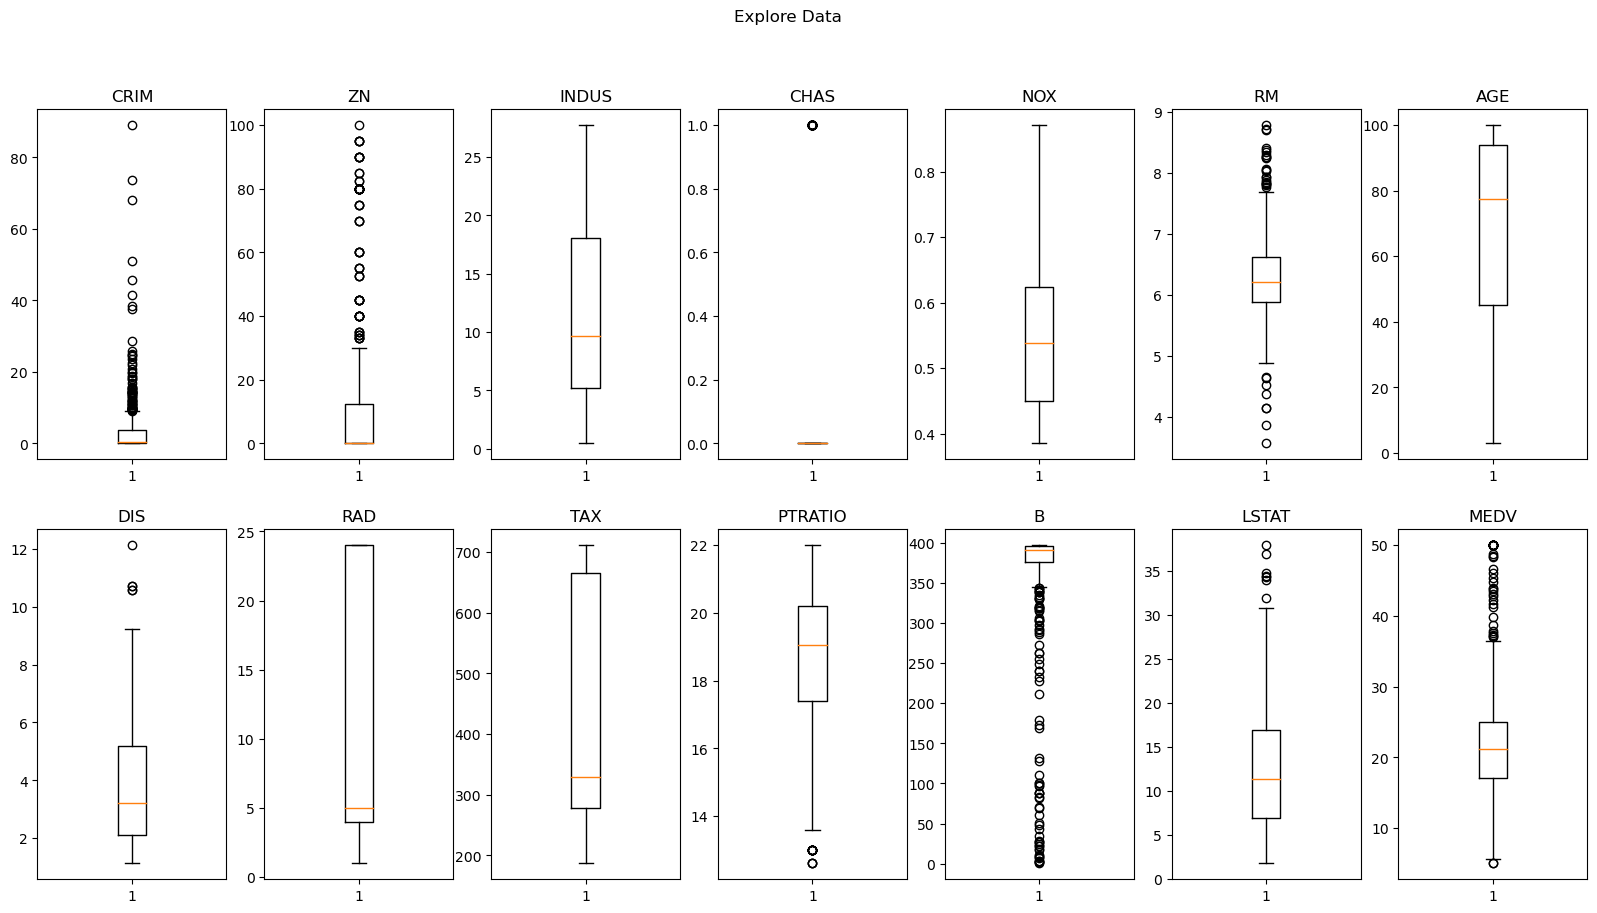

In [27]:
fig, axs = plt.subplots(2, 7, figsize = (20,10))
axs = axs.flatten()
fig.suptitle('Explore Data')
for i, ax in enumerate(axs) :
    ax.boxplot(df.iloc[:, i])
    ax.set_title(df.columns[i])

The r2 of CRIM is : 0.15


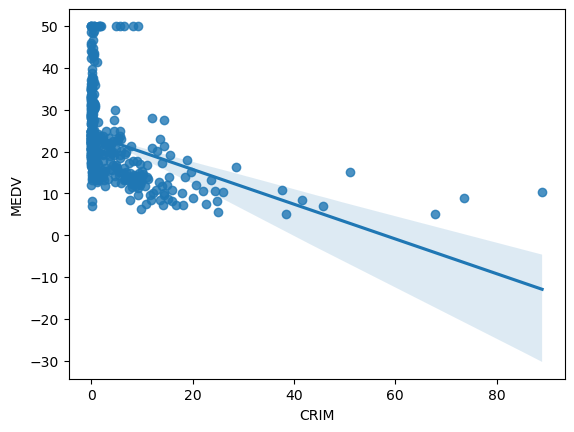

The r2 of ZN is : 0.13


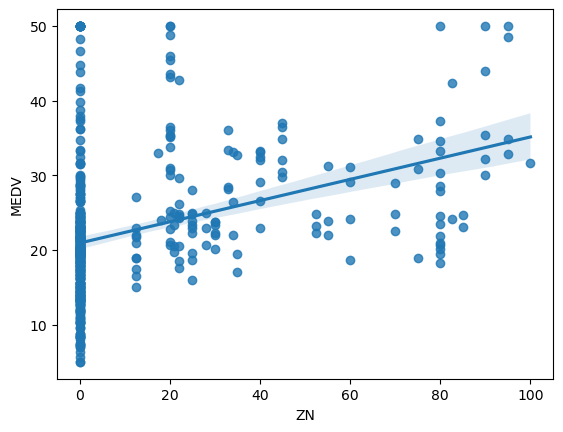

The r2 of INDUS is : 0.23


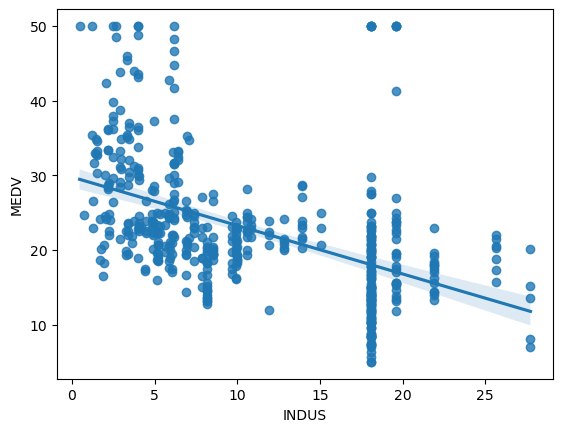

The r2 of CHAS is : 0.03


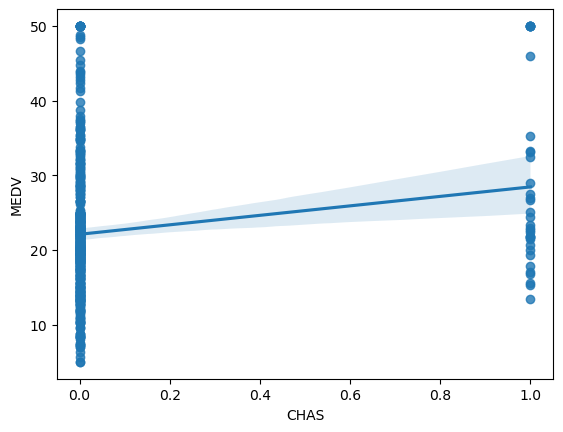

The r2 of NOX is : 0.18


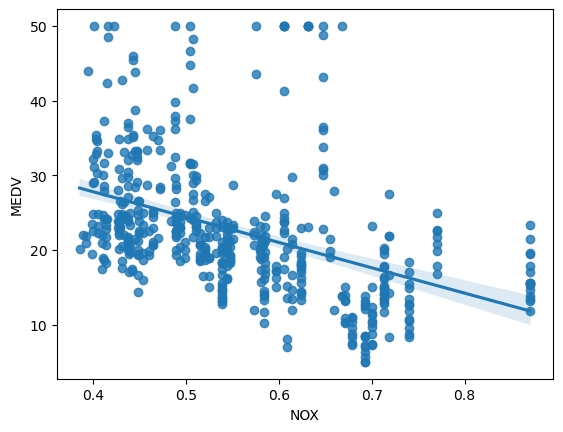

The r2 of RM is : 0.48


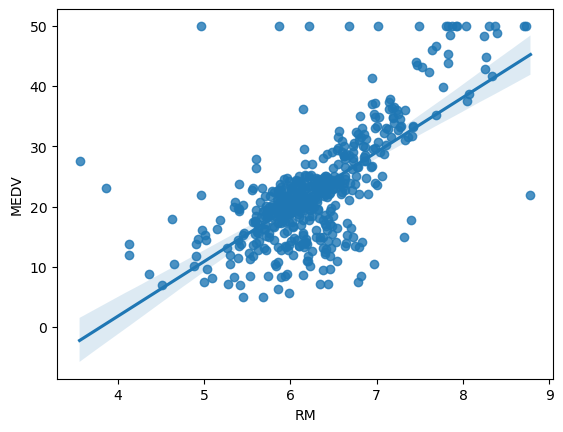

The r2 of AGE is : 0.14


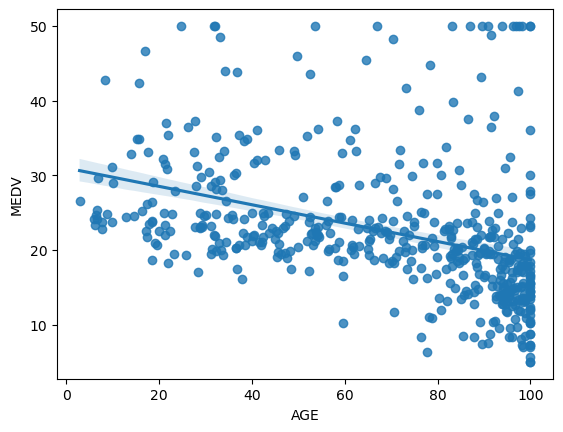

The r2 of DIS is : 0.06


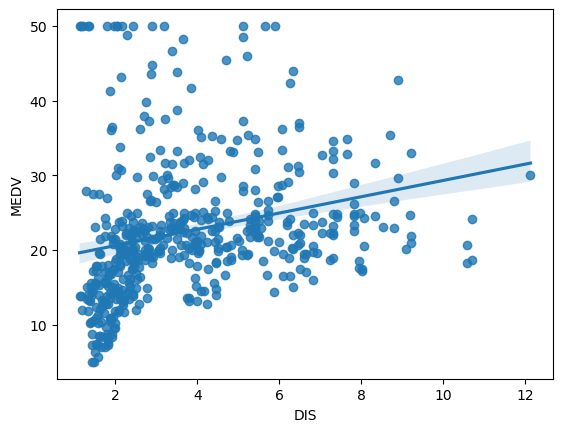

The r2 of RAD is : 0.15


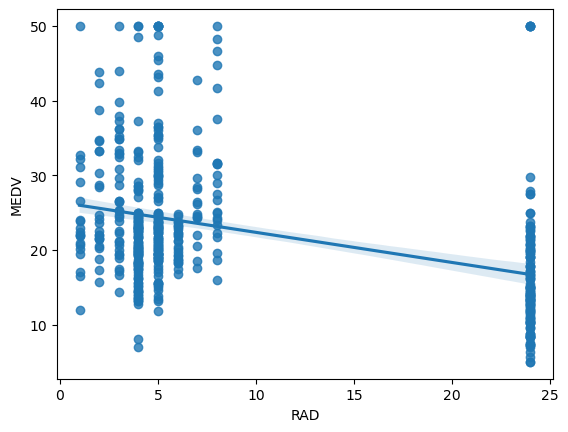

The r2 of TAX is : 0.22


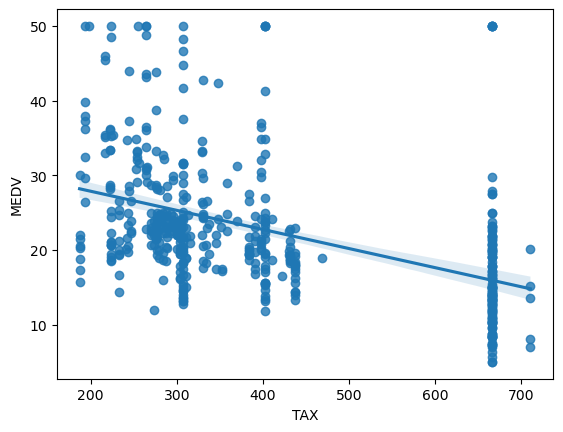

The r2 of PTRATIO is : 0.26


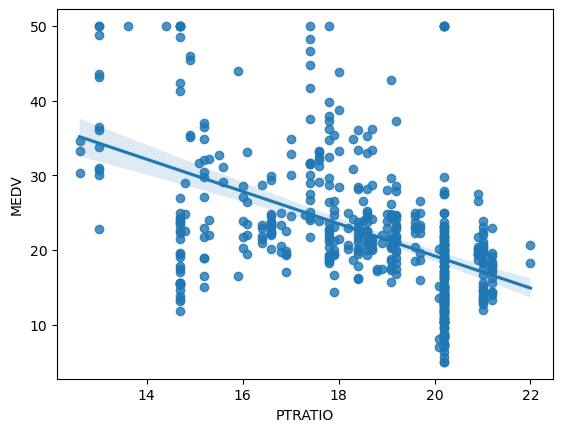

The r2 of B is : 0.11


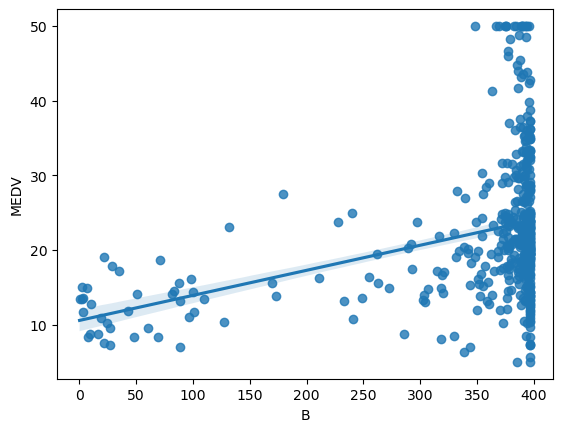

The r2 of LSTAT is : 0.54


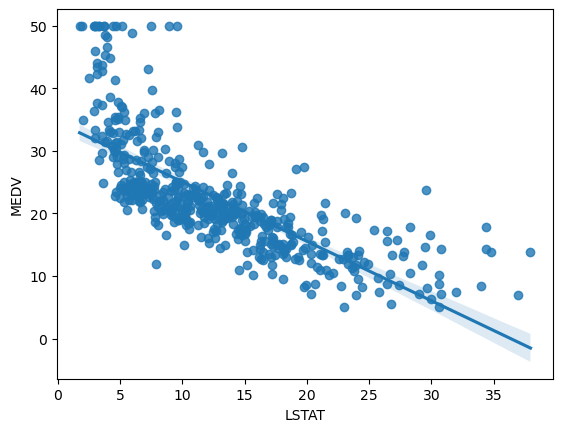

In [28]:
#sns.pairplot(data = df, size = 2.5)
lm = LinearRegression()
features = df.drop('MEDV', axis = 1)
target = df['MEDV']

for var in features.columns :
    lm.fit(df[[var]], target)
    print(f'The r2 of {var.upper()} is : {lm.score(df[[var]], target).round(2)}')
    sns.regplot(data = df, x = var, y = 'MEDV')
    plt.show()

<Axes: >

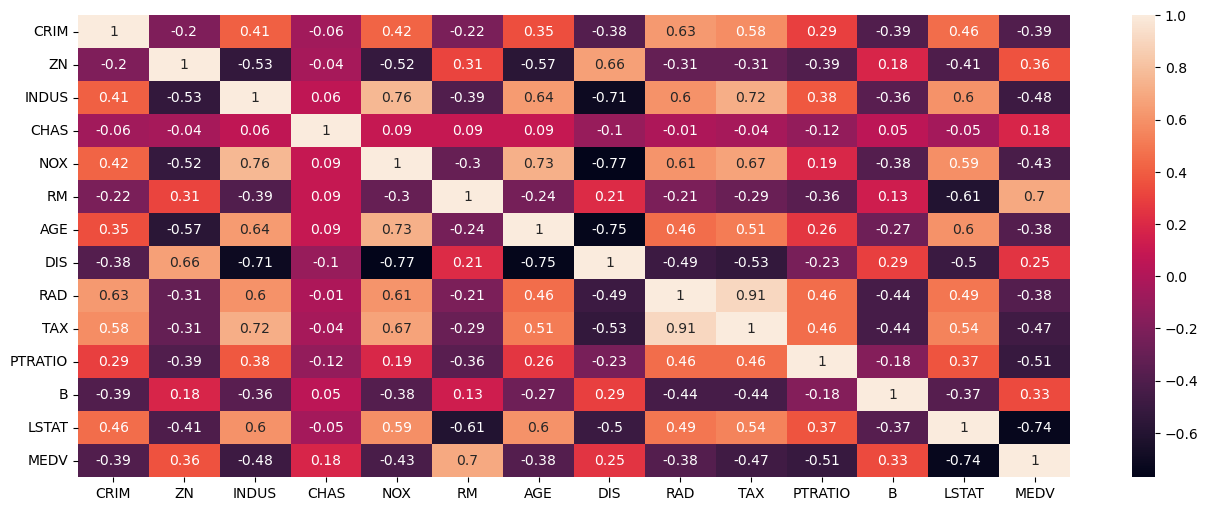

In [29]:
correlation = df.corr().round(2)
plt.figure(figsize=(16, 6))
sns.heatmap(data = correlation, annot = True)

# X and Y Lists

In [7]:
x = df[['RM', 'LSTAT']]
y = df['MEDV']

print(x.shape)
print(y.shape)

(506, 2)
(506,)


# Splitting Training and Testing Data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#  Creating and training the Logistic Regression Model

In [32]:
lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
# 2 Different methods of obtaining the same rsquare measure
#print(r2_score(y_train, yhat_train))
print('\033[1m'+'Model Performance of Training Data'+'\033[0m')
print('----------------------------------')
print(f'R2 of training data is : {lm.score(x_train, y_train)}')
print(f'RMSE of training data is : {np.sqrt(mean_squared_error(y_train, yhat_train))}')

lm2 = LinearRegression()
lm2.fit(x_test, y_test)
yhat_test = lm.predict(x_test)
print('')
print('\033[1m'+'Model Performance of Test Data'+'\033[0m')
print('----------------------------------')
print(f'R2 of training data is : {lm.score(x_test, y_test)}')
print(f'RMSE of training data is : {np.sqrt(mean_squared_error(y_test, yhat_test))}')

Model Performance of Training Data
----------------------------------
R2 of training data is : 0.6501592679428922
RMSE of training data is : 5.512880843371696

Model Performance of Test Data
----------------------------------
R2 of training data is : 0.5739577415025856
RMSE of training data is : 5.589569804715175


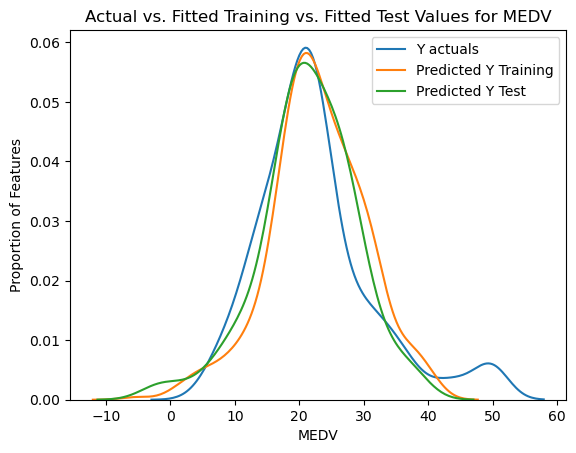

In [33]:
ax1 = sns.distplot(y, hist = False, color = 'tab:blue', label = 'Y actuals')
sns.distplot(yhat_train, hist = False, color = 'tab:orange', label = 'Predicted Y Training', ax = ax1)
sns.distplot(yhat_test, hist = False, color = 'tab:green', label = 'Predicted Y Test', ax = ax1)
plt.title('Actual vs. Fitted Training vs. Fitted Test Values for MEDV')
plt.xlabel('MEDV')
plt.ylabel('Proportion of Features')
plt.legend()
plt.show()
plt.close()

# Model Evaluation 

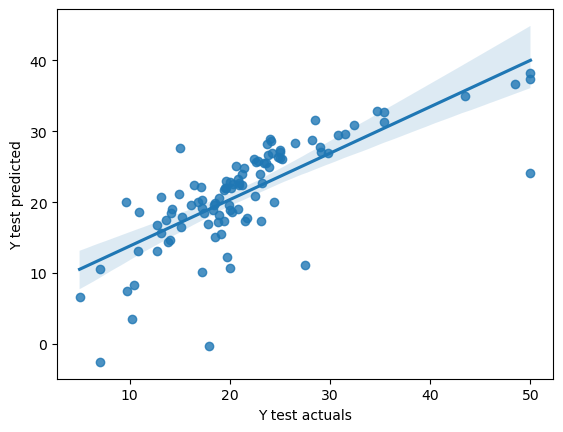

In [34]:
sns.regplot(x = y_test, y = yhat_test)
plt.xlabel('Y test actuals')
plt.ylabel('Y test predicted')
plt.show()

In [35]:
parameters = [{'alpha' : [0, 0.001, 0.01, 0.1, 1, 10, 100]}]
rr = Ridge()
grid1 = GridSearchCV(rr, parameters, cv = 5)
grid1.fit(x, y)
print(grid1.best_estimator_)

Ridge(alpha=100)


In [36]:
#Running another time with 10 k-folds still yields the same result
parameters = [{'alpha' : [0, 0.001, 0.01, 0.1, 1, 10, 100]}]
rr = Ridge()
grid1 = GridSearchCV(rr, parameters, cv = 10)
grid1.fit(x, y)
print(grid1.best_estimator_)


Ridge(alpha=100)


In [37]:
rsqarr = []
order = [1, 2, 3, 4]
# parameters = [0, 0.001, 0.01, 0.1, 1, 10, 100]

# This checks which polynomial order has the highest R-squared. In this case, it is the 3rd order (0.7557). 
for var in order :
    pr = PolynomialFeatures(degree = var)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    rm = Ridge(alpha = 100)
    rm.fit(x_train_pr, y_train)
    rsqarr.append(rm.score(x_test_pr, y_test))

print(rsqarr)
yhat_train_ridge = rm.predict(x_train_pr)
yhat_test_ridge = rm.predict(x_test_pr)

[0.5890965718916332, 0.7250407660886242, 0.7557073665823839, 0.734336555517462]


In [38]:
pr_final = PolynomialFeatures(degree = 3)
x_train_pr_final = pr_final.fit_transform(x_train)
x_test_pr_final = pr_final.fit_transform(x_test)

rm = Ridge(alpha = 100)
rm.fit(x_train_pr_final, y_train)
yhat_train_pr_final = rm.predict(x_train_pr_final)
print('\033[1m'+'Model Performance of Training Data'+'\033[0m')
print('----------------------------------')
print(f'R2 of training data is : {rm.score(x_train_pr_final, y_train)}')
print(f'RMSE of training data is : {np.sqrt(mean_squared_error(y_train, yhat_train_pr_final))}')

rm2 = Ridge(alpha = 100)
rm2.fit(x_test_pr_final, y_test)
yhat_test_pr_final = rm2.predict(x_test_pr_final)
print('')
print('\033[1m'+'Model Performance of Test Data'+'\033[0m')
print('----------------------------------')
print(f'R2 of test data is : {rm2.score(x_test_pr_final, y_test)}')
print(f'RMSE of test data is : {np.sqrt(mean_squared_error(y_test, yhat_test_pr_final))}')


Model Performance of Training Data
----------------------------------
R2 of training data is : 0.7591562479494826
RMSE of training data is : 4.574157466958183

Model Performance of Test Data
----------------------------------
R2 of test data is : 0.775004435545341
RMSE of test data is : 4.061991621822037


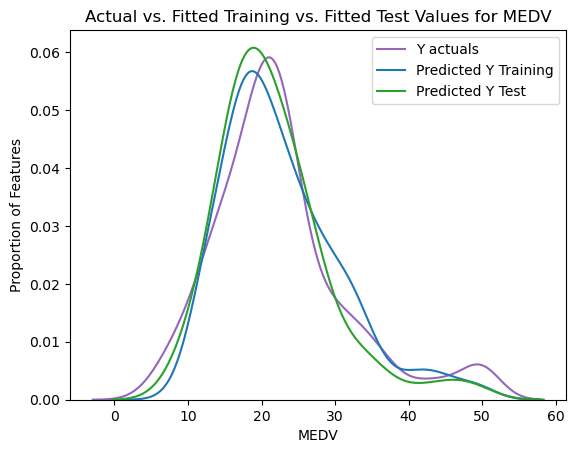

In [40]:
ax2 = sns.distplot(y, hist = False, color = 'tab:purple', label = 'Y actuals')
sns.distplot(yhat_train_pr_final, hist = False, color = 'tab:blue', label = 'Predicted Y Training', ax = ax2)
sns.distplot(yhat_test_pr_final, hist = False, color = 'tab:green', label = 'Predicted Y Test', ax = ax2)
plt.title('Actual vs. Fitted Training vs. Fitted Test Values for MEDV')
plt.xlabel('MEDV')
plt.ylabel('Proportion of Features')
plt.legend()
plt.show()
plt.close()

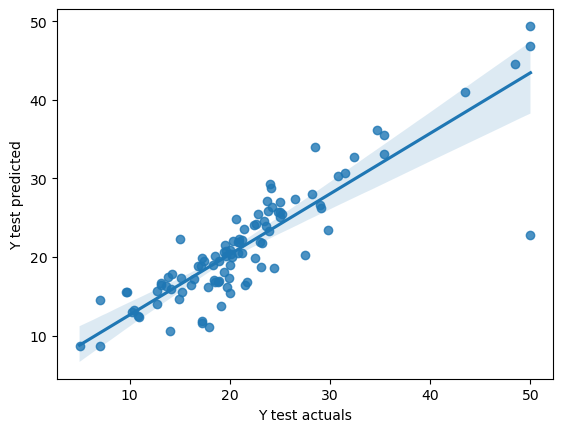

In [41]:
sns.regplot(x = y_test, y = yhat_test_pr_final)
plt.xlabel('Y test actuals')
plt.ylabel('Y test predicted')
plt.show()